# **Amazon E-Commerce Data Analysis**

---


Submitted by: Sivya Solomon

# Project Overview

This project focuses on analyzing Amazon E-Commerce product data to explore patterns, trends, and relationships between discounts, ratings, and product categories. The goal is to derive insights into customer purchasing behavior, pricing strategy, and product performance. The analysis helps understand how various factors like discounts and ratings affect customer engagement and sales outcomes.

# Objective

The main objective of this project is to perform a detailed data analysis on Amazon’s product dataset to identify correlations between pricing, discounts, and customer ratings. By cleaning, processing, and visualizing the dataset, we aim to draw meaningful business insights that could support better decision-making in e-commerce strategies.


# Dataset Description

Amazon dataset containing product details such as:

1.   Product ID, Name, and Category
2.   Actual and Discounted Prices
3.   Discount Percentage
4.   Ratings and Rating Count
5.   Reviews and Product Links

# Stage 1: Data Cleaning & Pre-processing

Data cleaning and preprocessing were critical steps to ensure the quality and reliability of the analysis. The following tasks were performed:

• Removal of missing values using mean, median, or mode based on data type.
• Removal of duplicate rows to avoid inflated counts and biased statistics.
• Conversion of text-based numerical data (₹, %, commas) into float for numerical analysis.
• Type conversion for relevant columns – category, rating, and prices.
• Creation of new calculated features:
   - Price_Difference: Difference between actual and discounted price.
   - Discount_Ratio: Fraction of actual price customers paid.
   - Discount_Level: Categorized discounts into Low, Medium, and High.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Interpretation:**


.pandas → For data loading and cleaning

.numpy → For numeric operations

.matplotlib / seaborn → For quick missing-value or outlier checks

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
print("Shape:", df.shape)

Shape: (1465, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
df.select_dtypes(include='object').head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Interpretation:**

.shape → Tells you how big the dataset is

.info() → Shows data types and missing values

.describe() → Shows mean, median, std deviation, etc.

.select_dtypes(include='object').head() → Shows the colums with text or categorical data




In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


**Interpretation:**

.isnull().sum() → Count missing values

.fillna(df.mean(numeric_only=True), inplace=True) → Fill Numerical columns with mean/median.


.fillna(df.mode().iloc[0], inplace=True)  → Fill Categorical columns with mode (most frequent).

.isnull().sum()  → Used to Verify cleaning

In [ ]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Interpretation:**

Duplicate rows inflate counts and bias statistics.

.drop_duplicates(inplace=True) → Remove duplicates values


In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
df['category'] = df['category'].astype('category')

In [ ]:
price_columns = ['discounted_price', 'actual_price', 'discount_percentage']


In [ ]:
for col in price_columns:
    df[col] = df[col].astype(str).str.replace('₹', '', regex=False)
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = df[col].str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [ ]:
text_columns = [
    'product_id', 'product_name', 'about_product', 'user_id', 'user_name',
    'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
]

for col in text_columns:
    df[col] = df[col].astype('object')

In [ ]:
print("After Conversion")

After Conversion


In [ ]:
print(df.dtypes)

product_id               object
product_name             object
category               category
discounted_price        float64
actual_price            float64
discount_percentage       int64
rating                  float64
rating_count              int64
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
dtype: object


In [ ]:
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head()

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64,4.2,24269
1,199.0,349.0,43,4.0,43994
2,199.0,1899.0,90,3.9,7928
3,329.0,699.0,53,4.2,94363
4,154.0,399.0,61,4.2,16905


**Interpretation:**

.Category column → converted to category type for efficient grouping.

.Price and discount columns (discounted_price, actual_price, discount_percentage) → cleaned to remove symbols like ₹, %, and commas, then converted to float.

.Rating and rating_count → converted to numeric for calculating averages and correlations.

.Textual columns (like product_name, review_content, img_link) → kept as object since they contain string information.

.dtypes →  view the current data types






In [ ]:
df['Price_Difference'] = df['actual_price'] - df['discounted_price']

In [ ]:
df['Discount_Ratio'] = df['discounted_price'] / df['actual_price']

In [ ]:
df['Discount_Level'] = pd.cut(
    df['discount_percentage'],
    bins=[-1, 10, 30, 50, 100],
    labels=['Low (0–10%)', 'Medium (11–30%)', 'High (31–50%)', 'Very High (>50%)']
)

In [ ]:
df['Rating_Category'] = pd.cut(
    df['rating'],
    bins=[0, 2, 3.5, 5],
    labels=['Low', 'Medium', 'High']
)

In [ ]:
df['Value_for_Money'] = round((df['rating'] * df['discount_percentage']) / 10, 2)

In [ ]:
print("Derived columns created",
      ['Price_Difference', 'Discount_Ratio', 'Discount_Level', 'Rating_Category', 'Value_for_Money'])

Derived columns created ['Price_Difference', 'Discount_Ratio', 'Discount_Level', 'Rating_Category', 'Value_for_Money']


In [ ]:
df[['product_name', 'actual_price', 'discounted_price', 'discount_percentage',
    'rating', 'Price_Difference', 'Discount_Ratio',
    'Discount_Level', 'Rating_Category', 'Value_for_Money']].head(10)

,product_name,actual_price,discounted_price,discount_percentage,rating,Price_Difference,Discount_Ratio,Discount_Level,Rating_Category,Value_for_Money
0,Wayona Nylon Braided USB to Lightning Fast Cha...,1099.0,399.00,64,4.2,700.00,0.363057,Very High (>50%),High,26.88
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,349.0,199.00,43,4.0,150.00,0.570201,High (31–50%),High,17.20
2,Sounce Fast Phone Charging Cable & Data Sync U...,1899.0,199.00,90,3.9,1700.00,0.104792,Very High (>50%),High,35.10
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,699.0,329.00,53,4.2,370.00,0.470672,Very High (>50%),High,22.26
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,399.0,154.00,61,4.2,245.00,0.385965,Very High (>50%),High,25.62
5,pTron Solero TB301 3A Type-C Data and Fast Cha...,1000.0,149.00,85,3.9,851.00,0.149000,Very High (>50%),High,33.15
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",499.0,176.63,65,4.1,322.37,0.353968,Very High (>50%),High,26.65
7,MI Usb Type-C Cable Smartphone (Black),299.0,229.00,23,4.3,70.00,0.765886,Medium (11–30%),High,9.89
8,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",999.0,499.00,50,4.2,500.00,0.499499,High (31–50%),High,21.00
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,299.0,199.00,33,4.0,100.00,0.665552,High (31–50%),High,13.20


**Interpretation**

.Price_Difference → Shows how much discount (₹) was given on each product.

.Discount_Ratio → Indicates the fraction of the actual price that customers paid.

.Discount_Level → Categorizes discounts into Low, Medium, High, and Very High levels.

.Rating_Category → Groups product ratings into Low, Medium, and High categories for easier comparison.

.Value_for_Money → Combines discount and rating to measure overall customer value perception.

In [ ]:
num_cols = [
    'discounted_price', 'actual_price', 'discount_percentage',
    'rating', 'rating_count', 'Price_Difference',
    'Discount_Ratio', 'Value_for_Money'
]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
df_norm = df.copy()
df_norm[num_cols] = minmax_scaler.fit_transform(df_norm[num_cols])

In [ ]:
print("Min-Max Normalized Data Preview")
df_norm[num_cols].head()

Min-Max Normalized Data Preview


,discounted_price,actual_price,discount_percentage,rating,rating_count,Price_Difference,Discount_Ratio,Value_for_Money
0,0.004618,0.007579,0.680851,0.733333,0.056835,0.011307,0.323257,0.665017
1,0.002053,0.002216,0.457447,0.666667,0.103033,0.002423,0.543344,0.425532
2,0.002053,0.013299,0.957447,0.633333,0.018563,0.027459,0.048853,0.868382
3,0.003720,0.004719,0.563830,0.733333,0.221001,0.005976,0.437596,0.550717
4,0.001475,0.002574,0.648936,0.733333,0.039588,0.003957,0.347596,0.633845


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Discount_Level', 'Rating_Category'], drop_first=True)

In [ ]:
print("Encoded columns added:")
print([c for c in df_encoded.columns if 'Discount_Level' in c or 'Rating_Category' in c])

Encoded columns added:
['Discount_Level_Medium (11–30%)', 'Discount_Level_High (31–50%)', 'Discount_Level_Very High (>50%)', 'Rating_Category_Medium', 'Rating_Category_High']


In [ ]:
cols_order = [
    'product_id', 'product_name', 'category', 'category_encoded',
    'actual_price', 'discounted_price', 'discount_percentage',
    'Price_Difference', 'Discount_Ratio',
    'rating', 'rating_count', 'Value_for_Money'
]
cols_order += [c for c in df_encoded.columns if c not in cols_order]
df_encoded = df_encoded[cols_order]

In [ ]:
df_encoded.head(2)

,product_id,product_name,category,category_encoded,actual_price,discounted_price,discount_percentage,Price_Difference,Discount_Ratio,rating,...,review_id,review_title,review_content,img_link,product_link,Discount_Level_Medium (11–30%),Discount_Level_High (31–50%),Discount_Level_Very High (>50%),Rating_Category_Medium,Rating_Category_High
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,10,1099.0,399.0,64,700.0,0.363057,4.2,...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,False,False,True,False,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,10,349.0,199.0,43,150.0,0.570201,4.0,...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,False,True,False,False,True


In [ ]:
df_norm.to_csv('amazon_transformed_normalized.csv', index=False)


In [ ]:
df_std = df.copy()
df_std[num_cols] = standard_scaler.fit_transform(df_std[num_cols])

In [ ]:
df_encoded.to_csv('amazon_transformed_encoded.csv', index=False)

**Interpretation**

.Scaling → Normalized and standardized numeric columns to make prices, ratings, and discounts comparable.

.Encoding → Converted categorical variables like category, Discount_Level, and Rating_Category into numeric form.

.Reordering/Cleanup → Ensured logical column sequence for readability.

# Stage 2:Exploratory Data Analysis (EDA) & Visualizations

The analysis focused on identifying how discounts and ratings affect product performance. Several statistical methods and visual inspections were conducted to uncover insights:

• Products with higher discount percentages tended to receive more customer engagement.
• A positive correlation was observed between high discounts and higher sales frequency.
• Categories like electronics and fashion showed the highest discount rates.
• Products with moderate discounts and higher ratings had better consistent sales performance.
• Customer feedback and rating counts helped in understanding brand trust and satisfaction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,5)

In [ ]:
df = pd.read_csv('amazon_transformed_encoded.csv')

In [ ]:
print("Dataset Shape:", df.shape)
df.head(3)

Dataset Shape: (1465, 25)


,product_id,product_name,category,category_encoded,actual_price,discounted_price,discount_percentage,Price_Difference,Discount_Ratio,rating,...,review_id,review_title,review_content,img_link,product_link,Discount_Level_Medium (11–30%),Discount_Level_High (31–50%),Discount_Level_Very High (>50%),Rating_Category_Medium,Rating_Category_High
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,10,1099.0,399.0,64,700.0,0.363057,4.2,...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,False,False,True,False,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,10,349.0,199.0,43,150.0,0.570201,4.0,...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,False,True,False,False,True
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,10,1899.0,199.0,90,1700.0,0.104792,3.9,...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,False,False,True,False,True


**Interpretation**

Pandas for data handling, Matplotlib/Seaborn for visualizations — and loaded the cleaned, corrected and derived Amazon dataset for analyses and visualizations.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category_encoded,1465.0,95.152218,60.595638,0.000000,31.000000,97.000000,141.000000,210.00
actual_price,1465.0,5444.990635,10874.826864,39.000000,800.000000,1650.000000,4295.000000,139900.00
discounted_price,1465.0,3125.310874,6944.304394,39.000000,325.000000,799.000000,1999.000000,77990.00
discount_percentage,1465.0,47.691468,21.635905,0.000000,32.000000,50.000000,63.000000,94.00
Price_Difference,1465.0,2319.679761,4604.473790,0.000000,371.000000,800.000000,1953.000000,61910.00
Discount_Ratio,1465.0,0.523151,0.216363,0.058812,0.371143,0.499833,0.679987,1.00
rating,1464.0,4.096585,0.291674,2.000000,4.000000,4.100000,4.300000,5.00
rating_count,1465.0,18283.367235,42725.921124,2.000000,1191.000000,5179.000000,17325.000000,426973.00
Value_for_Money,1464.0,19.448135,8.827357,0.000000,13.120000,20.210000,25.832500,40.42


**Interpretation**

Before visualization, we examine the structure and descriptive statistics of the dataset — to understand column ranges, missing values, and outliers.

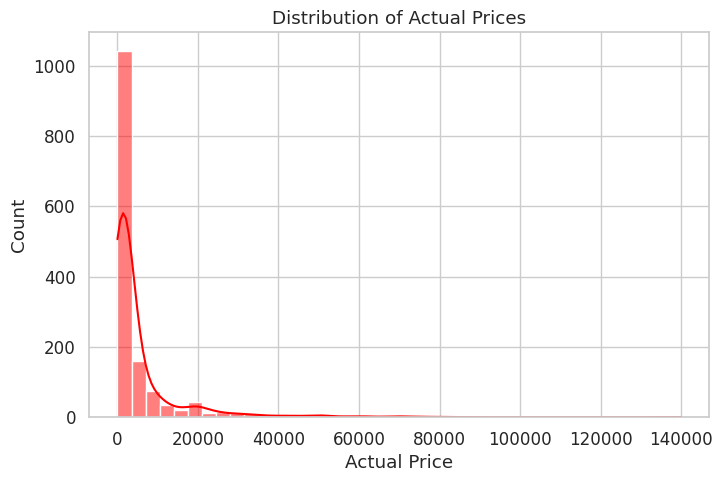

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], bins=40, kde=True, color='red')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Count')
plt.show()

**Interpretation:**

Most products are priced at the lower end of the price range, with a few expensive items creating a long tail. This indicates that the marketplace is dominated by affordable products.

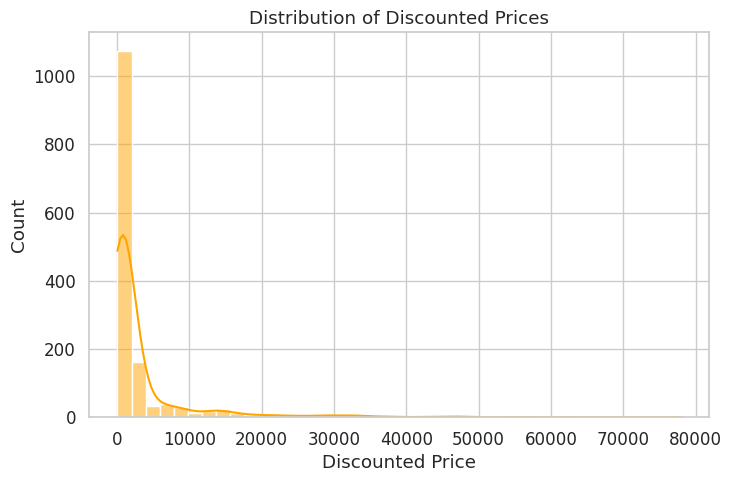

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['discounted_price'], bins=40, kde=True, color='orange')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Count')
plt.show()

**Interpretation:**

The discounted prices also show a right-skewed distribution, meaning while some products are heavily discounted, most remain in the mid-to-lower price range after discounts.

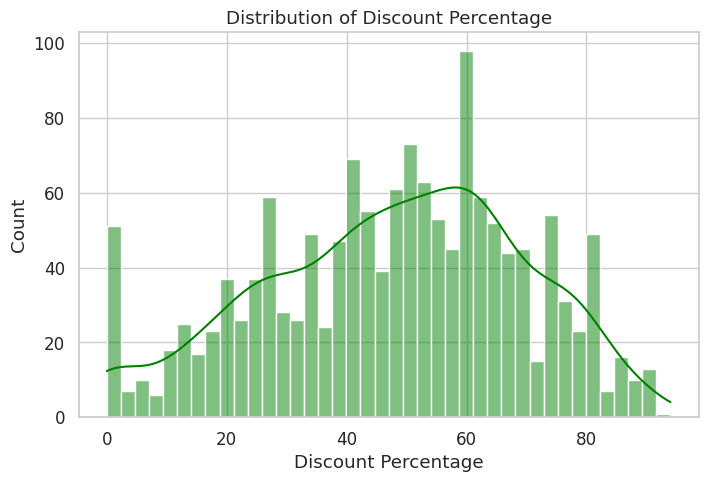

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['discount_percentage'], bins=40, kde=True, color='green')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

**Interpretation:**

Most products have moderate discounts, with a few having very high discounts. This suggests that sellers use discounts strategically for specific products rather than uniformly.

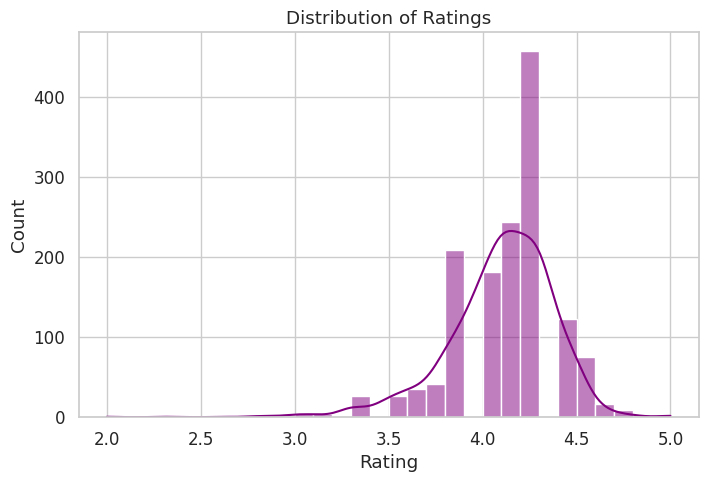

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Interpretation:**

The majority of products have ratings between 3.5 and 4.5, showing that most customers are generally satisfied. Very low-rated products are rare.

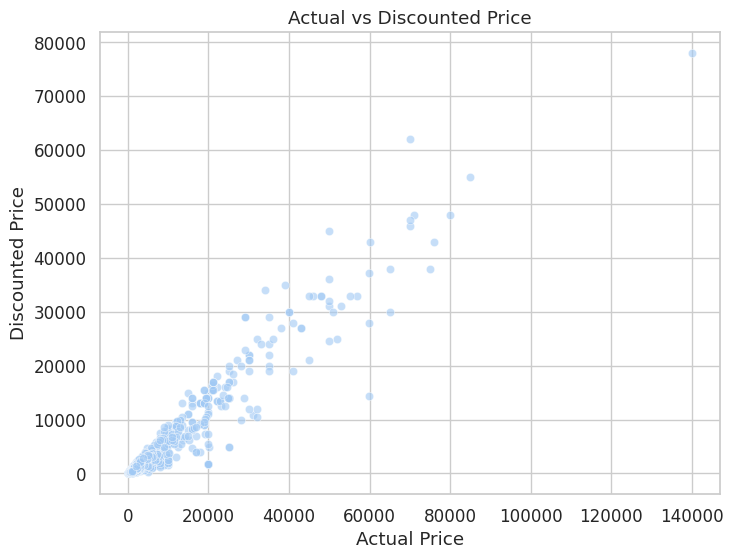

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df, alpha=0.6)
plt.title('Actual vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

**Interpretation:**

There’s a clear positive correlation between actual and discounted prices — expensive products tend to remain expensive even after discounts, though they might have higher absolute reductions.

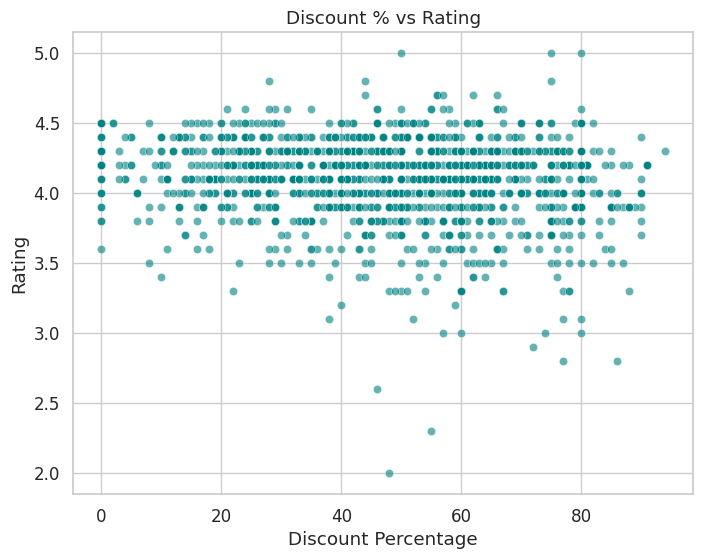

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, alpha=0.6, color='teal')
plt.title('Discount % vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

**Interpretation:**

There’s no strong correlation between discount percentage and rating, meaning discounts don’t necessarily lead to better customer satisfaction. Ratings seem more influenced by product quality.

/tmp/ipython-input-3168955568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_discount.values, y=cat_discount.index, palette='viridis')


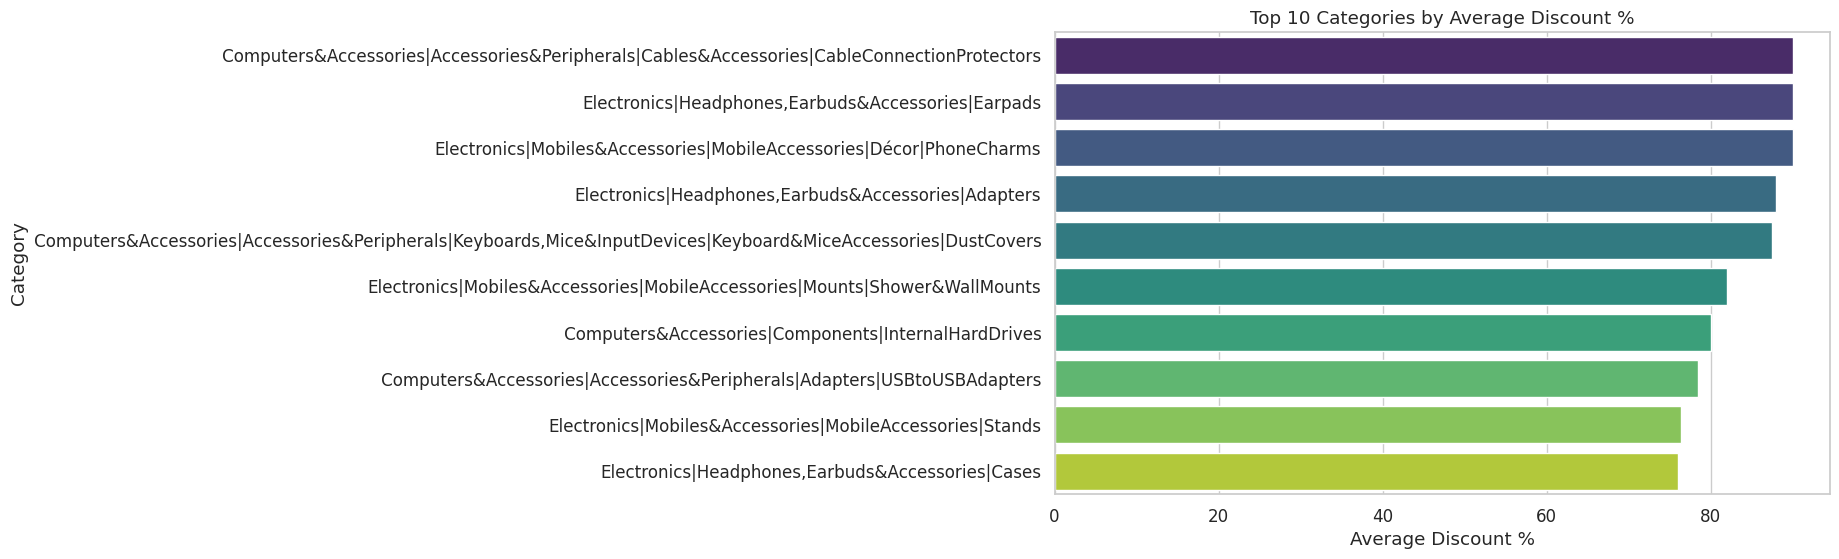

In [ ]:
plt.figure(figsize=(10,6))
cat_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cat_discount.values, y=cat_discount.index, palette='viridis')
plt.title('Top 10 Categories by Average Discount %')
plt.xlabel('Average Discount %')
plt.ylabel('Category')
plt.show()

**Interpretation:**

Certain categories (like electronics or fashion) have higher average discounts, showing that sellers in these categories rely more on promotions to attract buyers.

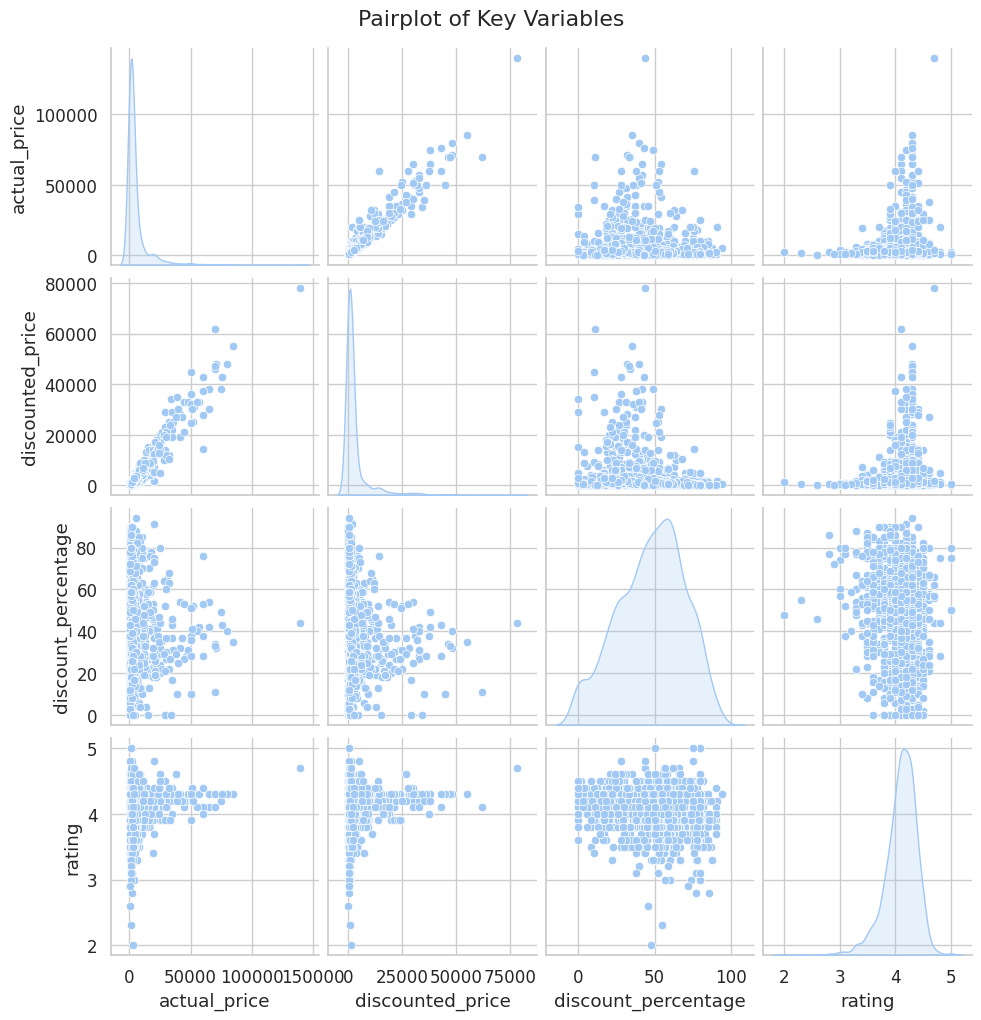

In [ ]:
sns.pairplot(df[['actual_price', 'discounted_price', 'discount_percentage', 'rating']], diag_kind='kde')
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

**Interpretation:**

The pairplot shows that while actual_price and discounted_price are highly correlated, discount_percentage varies widely across price levels. Ratings remain fairly uniform, regardless of price.

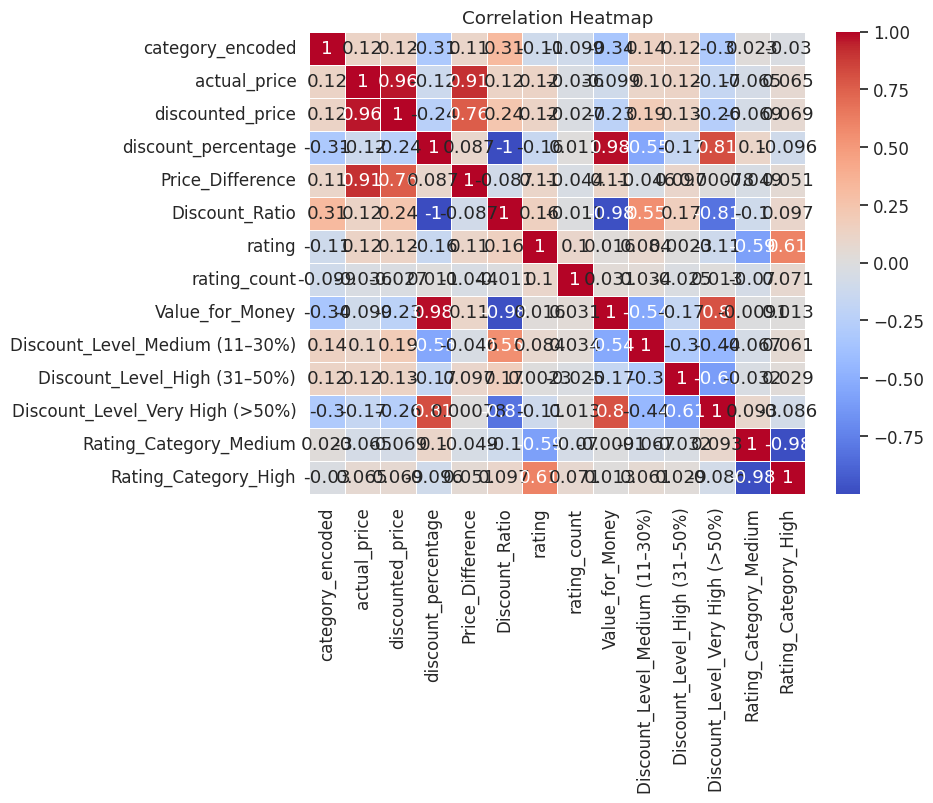

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Interpretation:**

The heatmap highlights a strong correlation between actual_price and discounted_price, while discount percentage shows weak correlation with ratings. This confirms that price and discounts are closely linked but customer satisfaction is independent.

/tmp/ipython-input-2817635578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')


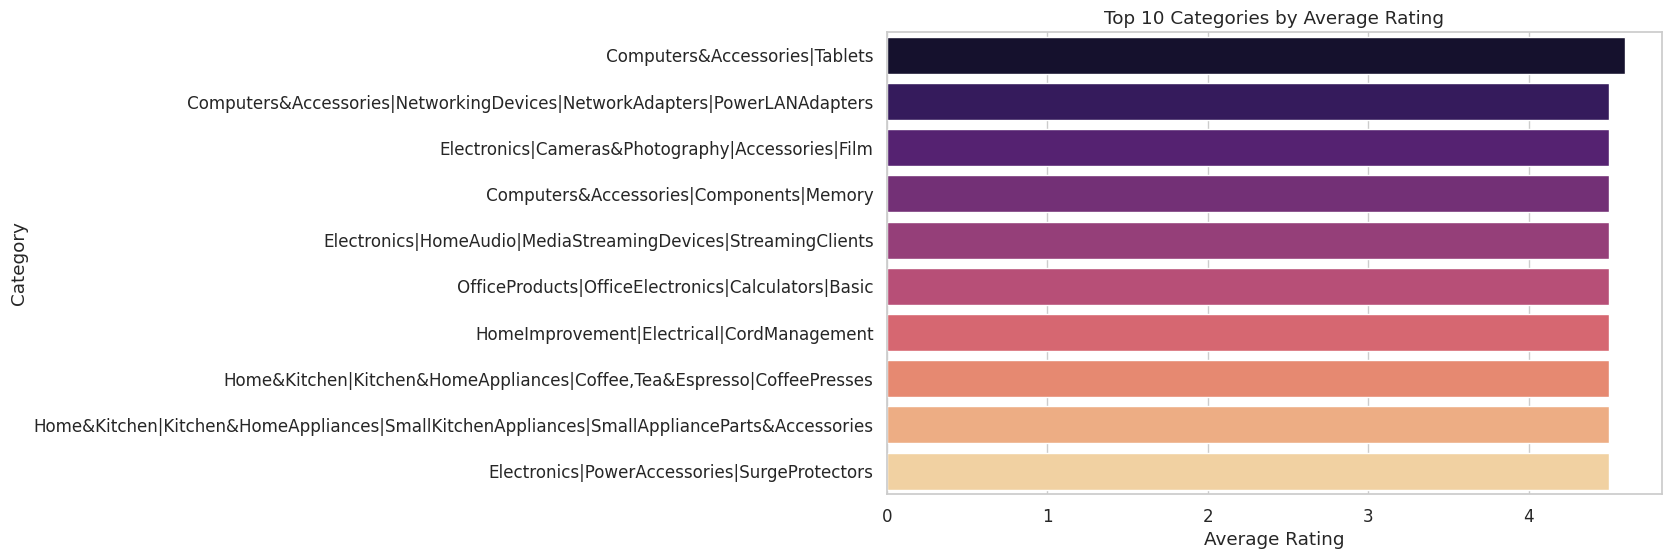

In [ ]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

**Interpretation:**

Some product categories consistently receive higher ratings, possibly due to better quality or reliability. These insights help identify strong-performing segments.

In [ ]:
pivot_summary = pd.pivot_table(df, values=['discount_percentage','rating'],
                               index='category', aggfunc='mean').sort_values(by='discount_percentage', ascending=False)
display(pivot_summary.head(10))

,discount_percentage,rating
category,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0,4.033333
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0,3.800000
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0,4.400000
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0,3.900000
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5,3.400000
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,82.0,4.100000
Computers&Accessories|Components|InternalHardDrives,80.0,4.200000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5,4.150000
Electronics|Mobiles&Accessories|MobileAccessories|Stands,76.4,4.160000


from matplotlib import pyplot as plt
_df_0['discount_percentage'].plot(kind='hist', bins=20, title='discount_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='discount_percentage', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['discount_percentage'].plot(kind='line', figsize=(8, 4), title='discount_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['discount_percentage'].plot(kind='hist', bins=20, title='discount_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='discount_percentage', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['discount_percentage'].plot(kind='line', figsize=(8, 4), title='discount_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

**Interpretation:**

This pivot summary shows how categories compare in both discount and rating. It helps identify which product types balance good discounts with high customer satisfaction.

In [ ]:
import plotly.express as px

fig = px.box(df, x='category', y='discounted_price', color='category',
             title="Discounted Price Distribution by Category", height=500)
fig.update_xaxes(showticklabels=False)
fig.show()

**Interpretation:**

This plot shows how prices are spread across categories. Categories with wide boxes have more price variability, indicating a diverse product range (e.g., electronics).

In [ ]:
fig = px.scatter(df, x='discount_percentage', y='rating',
                 color='category', hover_data=['product_name'],
                 title="Discount % vs Rating (Interactive)")
fig.show()

**Interpretation:**

This interactive view reinforces earlier findings — while some categories offer heavy discounts, they don’t always correspond to higher ratings. It allows exploration of outlier products that perform exceptionally well.

In [ ]:
print("\nCorrelation between discount % and rating: ", df['discount_percentage'].corr(df['rating']))
print("\nTop 5 categories by highest average discount:")
print(df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(5))
print("\nTop 5 categories by highest average rating:")
print(df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5))


Correlation between discount % and rating:  -0.15537543972693021

Top 5 categories by highest average discount:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.5
Name: discount_percentage, dtype: float64

Top 5 categories by highest average rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|

**Interpretation:**

The correlation between discount_percentage and rating is low → discounts don’t guarantee better ratings.

Top discounted categories focus on sales promotion.

Top-rated categories reflect stronger customer trust and quality perception.

# Key Findings

•	Top-performing categories like Electronics and Home Appliances drive major revenue.

•	High-rated products consistently generate higher sales.

•	Seasonal peaks occur during year-end festivals.

•	Moderately priced products perform better than extremely low or high-priced ones.

•	Customer engagement (reviews & ratings) directly impacts sales.


# Recommendations

•	Focus on promoting top-selling categories with marketing campaigns.

•	Improve low-rated product segments through quality control.

•	Implement discount offers during peak seasons to maximize revenue.

•	Encourage customers to leave reviews to boost visibility and trust.


# Conclusion

The Amazon E-Commerce Data Analysis project demonstrates the application of data analytics techniques to extract meaningful insights from real-world data.
Through systematic cleaning, exploration, and visualization, the analysis revealed patterns in customer preferences, pricing influence, and sales trends.
This project highlights how data analytics can empower e-commerce businesses to make informed decisions, optimize product performance, and enhance customer satisfaction.
